William Andrés Gómez Roa

Punto 1

Parcial 3

In [ ]:
#PACKAGES LOADING
install.packages("randomForest")
install.packages("caret")
library(randomForest)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [ ]:
#DATASET LOADING
Hospital_data<-read.csv("Datos_Hospital.csv", sep=";")
str(Hospital_data)


'data.frame':	3698 obs. of  11 variables:
 $ SN                  : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ AgeYrs              : chr  "33" "12" "3" "63" ...
 $ Estimatedcost       : chr  "70000" "30000" "75000" "40000" ...
 $ LengthofStay        : int  33 2 1 6 2 7 1 2 4 2 ...
 $ InsPayorcategory    : int  2 5 5 3 5 3 3 5 5 3 ...
 $ CE_VALUEFORMONEY    : int  2 3 3 3 3 2 2 3 3 3 ...
 $ CE_CSAT             : int  2 3 3 3 3 3 2 3 3 3 ...
 $ AE_PATIENTSTATUSINFO: int  4 4 3 3 4 4 3 3 4 4 ...
 $ CE_ACCESSIBILITY    : int  3 4 3 4 4 4 3 4 3 4 ...
 $ CE_NPS              : int  7 7 8 8 7 5 5 7 7 8 ...
 $ NPS_Status          : chr  "Detractor" "Detractor" "Detractor" "Detractor" ...


In [ ]:
#PREPROCESSING
Hospital_data$AgeYrs <- as.numeric(Hospital_data$AgeYrs)
Hospital_data$Estimatedcost <- as.numeric(Hospital_data$Estimatedcost)
Hospital_data$NPS_Status <- as.factor(Hospital_data$NPS_Status)
Hospital_data <- Hospital_data[!is.na(Hospital_data$AgeYrs) & !is.na(Hospital_data$Estimatedcost), ]

str(Hospital_data)

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”


'data.frame':	3562 obs. of  11 variables:
 $ SN                  : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ AgeYrs              : num  33 12 3 63 27 50 45 22 83 29 ...
 $ Estimatedcost       : num  70000 30000 75000 40000 25000 60000 30000 30000 50000 25000 ...
 $ LengthofStay        : int  33 2 1 6 2 7 1 2 4 2 ...
 $ InsPayorcategory    : int  2 5 5 3 5 3 3 5 5 3 ...
 $ CE_VALUEFORMONEY    : int  2 3 3 3 3 2 2 3 3 3 ...
 $ CE_CSAT             : int  2 3 3 3 3 3 2 3 3 3 ...
 $ AE_PATIENTSTATUSINFO: int  4 4 3 3 4 4 3 3 4 4 ...
 $ CE_ACCESSIBILITY    : int  3 4 3 4 4 4 3 4 3 4 ...
 $ CE_NPS              : int  7 7 8 8 7 5 5 7 7 8 ...
 $ NPS_Status          : Factor w/ 2 levels "Detractor","Promotor": 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# TRAIN and TEST
set.seed(8837)

indices <- sample(1:nrow(Hospital_data), size = 0.65 * nrow(Hospital_data))
train_data <- Hospital_data[indices, ]  # Conjunto de entrenamiento
test_data <- Hospital_data[-indices, ]

In [ ]:
#TRAINING
set.seed(8837)

rf_base <- randomForest(NPS_Status ~ ., data = train_data)
probabilities <- predict(rf_base, newdata = test_data, type = "prob")
head(probabilities)

,Detractor,Promotor
3,1.000,0.000
4,1.000,0.000
5,1.000,0.000
12,1.000,0.000
23,1.000,0.000
25,0.998,0.002


In [ ]:
# BASE (umbral = 0.5)
predictions_default <- ifelse(probabilities[, "Promotor"] >= 0.5, "Promotor", "Detractor")

# LOW (umbral = 0.01)
predictions_low <- ifelse(probabilities[, "Promotor"] >= 0.01, "Promotor", "Detractor")

# HIGH (umbral = 0.95)
predictions_high <- ifelse(probabilities[, "Promotor"] >= 0.95, "Promotor", "Detractor")


In [ ]:
library(caret)

true_labels <- as.factor(test_data$NPS_Status)

conf_matrix_default <- confusionMatrix(as.factor(predictions_default), true_labels)
conf_matrix_low <- confusionMatrix(as.factor(predictions_low), true_labels)
conf_matrix_high <- confusionMatrix(as.factor(predictions_high), true_labels)

# PRINTING
cat("\nUMBRAL POR DEFECTO (0.5):\n")
print(conf_matrix_default)
cat("UMBRAL MENOR(0.01):\n")
print(conf_matrix_low)
cat("UMBRAL MAYOR (0.95):\n")
print(conf_matrix_high)



UMBRAL POR DEFECTO (0.5):
Confusion Matrix and Statistics

           Reference
Prediction  Detractor Promotor
  Detractor       616        0
  Promotor          0      631
                                    
               Accuracy : 1         
                 95% CI : (0.997, 1)
    No Information Rate : 0.506     
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.000     
            Specificity : 1.000     
         Pos Pred Value : 1.000     
         Neg Pred Value : 1.000     
             Prevalence : 0.494     
         Detection Rate : 0.494     
   Detection Prevalence : 0.494     
      Balanced Accuracy : 1.000     
                                    
       'Positive' Class : Detractor 
                                    
UMBRAL MENOR(0.01):
Confusion Matrix and Statisti

## **-** Se creo y entreno un modelo de Random Forest llamado rf_base ("modelo rf base")

## **1.** Determine si es mejor utilizar un umbral (recuerde que el dataset está desbalanceado) para clasificar un individuo en DETRACTOR/PROMOTOR con base en la probabilidad generada por el modelo (pruebe un valor bajo y un valor alto del umbral), o utilizar la clasificación directa entregada por el modelo (umbral = 0.5).

  ### **Respuesta:**  No es mejor utilizar un umbral diferente a la probabilidad directa entregada por el modelo (umbral = 0.5). Como se observó anterioremente en los resultados, El umbral de 0.5 alcanzó la perfección en la calsificación del dataset de prueba (test_data). Fue necesarió cambiar los umbrales a valores extremadamente altos o bajos, con el fin de evidenciar algún error de clasificación cosniderable. Esto solo se logró con Umbrales de 0.1 o 0.95.

## **2.** ¿Cómo se podría aplicar una regularización en el modelo RF base? Si es posible, aplíquelo y demuestre que el modelo fue regularizado. Si no es posible, explique brevemente porqué. Recuerde que regularización es cualquier cambio en los parámetros del modelo que disminuya la exactitud en entrenamiento, y que la aumente en prueba.

Se puede aplicar regularización al modelo Random Forest ajustando los parámetros `mtry` y `ntree`. Reducir `mtry` limita el número de variables consideradas en cada división, evitando sobreajuste. Disminuir `ntree` controla la cantidad de árboles, simplificando el modelo.

Sin embargo, Random Forest ya incluye mecanismos de regularización implícita a través de bagging y selección aleatoria de variables, lo que puede reducir la necesidad de ajustes adicionales en ciertos casos.

In [ ]:
rf_regu_1 <- randomForest(NPS_Status ~ ., data = train_data,  mtry = 2, importance = TRUE)
rf_regu_1
rf_regu_2 <- randomForest(NPS_Status ~ ., data = train_data,  ntree = 40, importance = TRUE)
rf_regu_2


Call:
 randomForest(formula = NPS_Status ~ ., data = train_data, mtry = 2,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 0%
Confusion matrix:
          Detractor Promotor class.error
Detractor      1151        0           0
Promotor          0     1164           0


Call:
 randomForest(formula = NPS_Status ~ ., data = train_data, ntree = 40,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 40
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0%
Confusion matrix:
          Detractor Promotor class.error
Detractor      1151        0           0
Promotor          0     1164           0

Sin embargo no es posible obtener mejor resultados que los que ya se habían obtenido, si se puede conseguir desarrollar un modelo más ligero y simple usando los parámetros anteriores.

## **3.** Utilizando el modelo RF base, determine la variable que más influye en determinar si alguien es DETRACTOR o PROMOTOR. Teniendo en cuenta esta variable, ¿cuál podría ser una estrategia para aumentar el NPS?

In [ ]:
# Obtener la importancia de las variables
variable_importance <- importance(rf_base)
print(variable_importance)

                     MeanDecreaseGini
SN                        522.7507384
AgeYrs                      1.1205650
Estimatedcost               0.9076121
LengthofStay                0.7663523
InsPayorcategory            0.7140749
CE_VALUEFORMONEY           26.9552597
CE_CSAT                    39.4496807
AE_PATIENTSTATUSINFO        5.3692055
CE_ACCESSIBILITY           10.5589304
CE_NPS                    547.7493212


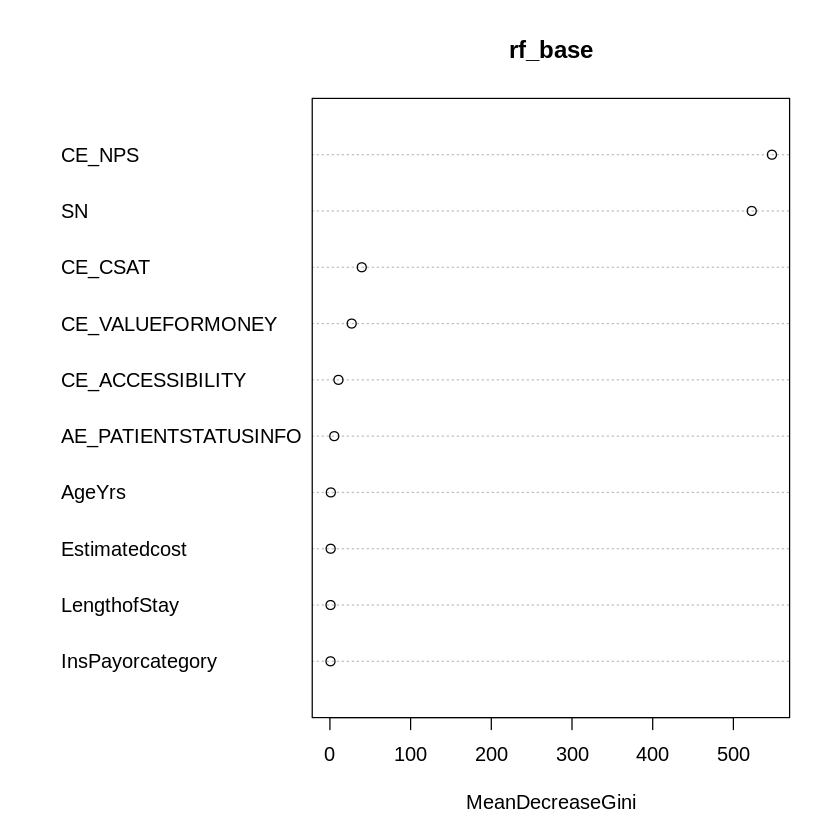

In [ ]:
# Opcional: Visualizar con un gráfico
varImpPlot(rf_base)

La variable `CE_NPS` es la más influyente en determinar si un paciente es Detractor o Promotor, con un valor de 547.75, seguida de `SN` (522.75). Sin embargo, la variable `SN` es el número de identificación del paciente
, por lo que se debe ignorar en este análisis.

Además el alto nivel de importancia de la variable `CE_NPS` puede deberse fuertemente al echo de que es simplemente dicha variable pero clasificada en 2 categorías para obtener el `NPS` : DETRACTOR (`CE_NPS` <= 8) y PROMOTOR (`CE_NPS` >=9).

Entonces para mejorar el `NPS` bastará con mejorar  los factores que influyen en la percepción del paciente, en concreto se debe intentar obtener la moyor cantidad de putnaje en esta pregunta: ¿Qué tan probable es que nos recomiende a un amigo o familiar?, así se mejorará el `NPS` final.